# PositionalEncoding

transformer의 attention 연산은 시퀀스의 순서를 고려하지 않는 연산이기 때문에<br>
Transformer Network 'sequence order' 개념을 처리할 능력이 없음

이런 한계를 극복하기 위해 다양한 Position Embedding 방법이 제안됨<br>
이번 Position Embedding 방법은 transformer 논문에서 제안된 sinusoidal 함수 기반의 Positional Encoding<br>
해당 인코딩 방법은 not learnable

### 입력
인코딩하려는 대상은 Embedding Layer를 통과한 텐서로<br>
`[batch, seq_length, embedding_dim]`의 크기를 갖음

### 공식

$$PE(pos, 2i) = \sin\left(\frac{pos}{10000^{\frac{2i}{d_{model}}}}\right)$$
$$PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{\frac{2i}{d_{model}}}}\right)$$

: $pos$은 토큰의 위치, $i$는 임베딩의 i번 째 차원, $d_{model}$은 전체 임베딩 차원

### 적용

Positional Encoding을 통해 각 토큰의 위치에 맞는 값을 구한 뒤 <br>
각 토큰의 임베딩에 위치에 위치 정보를 더하여 모델이 토큰의 순서를 인식할 수 있게 만들고 <br>
Transformer 모델에 들어가 Attention 연산을 수행함



### PositionalEncoding 정의

`max_len`과 `d_model`을 매개변수로 넣으면 해당하는 크기로 PositionalEncoding이 생성된다 <br>
입력 값에 따라 생성되는 것이 아닌 입력 크기에 따라 생성되는 것이다.


In [15]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()

        # Create a matrix of shape (max_len, d_model)
        pe = torch.zeros(max_len, d_model)
        
        # 토큰의 위치에 대한 텐서
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        # 나누는 값은 동일함
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # 홀수 인덱스와 짝수 인덱스를 구분 
        pe[:, 0::2] = torch.sin(position * div_term) # 0부터 2단위로 슬라이싱 (짝수)
        pe[:, 1::2] = torch.cos(position * div_term) # 1부터 2단위로 슬라이싱 (홀수)

        pe = pe.unsqueeze(0)  # Add batch dimension
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: Tensor of shape (batch_size, seq_len, d_model)
        """
        # 배치에 대해선 브로드캐스팅 연산
        x = x + self.pe[:, :x.size(1), :]
        return x

In [16]:
# Example usage
d_model = 512  # Dimensionality of token embeddings
max_len = 100  # Maximum length of input sequences

pos_encoder = PositionalEncoding(d_model, max_len)
token_embeddings = torch.randn(32, 100, d_model)  # Example token embeddings (batch_size, seq_len, d_model)

# Apply positional encoding
encoded_tokens = pos_encoder(token_embeddings)

print(encoded_tokens.shape)  # Should be (32, 100, 512)

torch.Size([32, 100, 512])


# PositionalEncoding - Plot

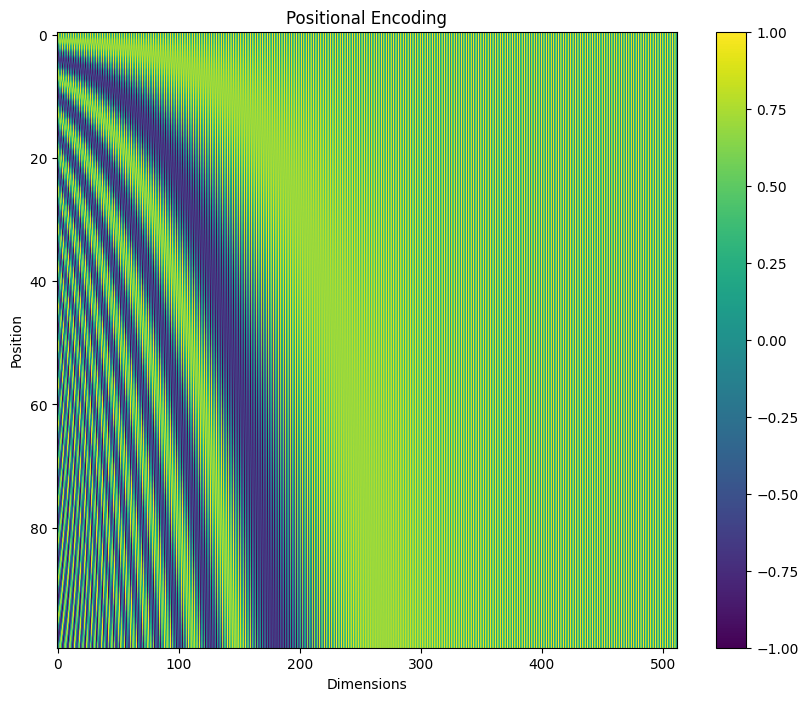

In [20]:
import matplotlib.pyplot as plt

# Create PositionalEncoding instance and get positional encodings
pos_enc = PositionalEncoding(d_model, max_len)
pe = pos_enc.pe.squeeze(0)  # Remove the batch dimension

# Plotting
plt.figure(figsize=(10, 8))
plt.imshow(pe.detach().numpy(), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Positional Encoding')
plt.xlabel('Dimensions')
plt.ylabel('Position')
plt.show()